<a href="https://colab.research.google.com/github/nstshirotays/Study-AI/blob/master/%E7%AC%AC%E4%B8%89%E5%9B%9EAi%E5%8B%89%E5%BC%B7%E4%BC%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![01](https://drive.google.com/uc?export=view&id=1KDrLWkoe9IpEXd4Y5Blv3O2nOkgqz4FO)
![02](https://drive.google.com/uc?export=view&id=1590E0wpD761voH1XgpfEI7_LO1Ve68OG)
![03](https://drive.google.com/uc?export=view&id=1BHbxK9ZT-v7pEKurYuRxIIL4aLioue2X)
![04](https://drive.google.com/uc?export=view&id=1aJMdTnORy8agqNTZjSwJzsSEnKFtnzYb)
![05](https://drive.google.com/uc?export=view&id=1egrvSPstYh6Bj1W_JMOpW07WQQ0j5EMY)
![06](https://drive.google.com/uc?export=view&id=12gO3gVosADQyfnMgWqQgr-UlL4826vcU)
![07](https://drive.google.com/uc?export=view&id=1Kza16MSbBWuHbmcMkqBchrNNlTcNTaLu)
![08](https://drive.google.com/uc?export=view&id=12ytx8jqHq9aiCUKSuzxfFXVECRpC8xkH)
![09](https://drive.google.com/uc?export=view&id=186Lyl1WBlG1GQ518Q2LgBUi_YLbP2W1Z)


In [ ]:
!git clone https://github.com/wojzaremba/lstm.git


Cloning into 'lstm'...
remote: Enumerating objects: 53, done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 53
Receiving objects: 100% (53/53), 1.91 MiB | 4.08 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [ ]:
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.word2vec import LineSentence

# データの読み込み
# データはPTBコーパスを使用
data = gensim.models.word2vec.LineSentence('lstm/data/ptb.train.txt')

# モデルの作成
model = Word2Vec(data, vector_size=100, window=5, min_count=4, workers=4)

# モデルの保存
model.wv.save('word2vec.wordvectors')

# モデルの読み込み
wv = KeyedVectors.load('word2vec.wordvectors', mmap='r')

# 単語の類似度の計算
print("----------------")
print("　単語の類似度　")
print("----------------")
print(f"「man」と「woman」の類似度: {wv.similarity('man', 'woman'):.4f}")
print(f"「king」と「queen」の類似度: {wv.similarity('king', 'queen'):.4f}")
print(f"「toyota」と「honda」の類似度: {wv.similarity('toyota', 'honda'):.4f}")
print(f"「car」と「bike」の類似度: {wv.similarity('car', 'bike'):.4f}")
print("")

# 'japan'に最も近い単語の上位10個を表示
print("----------------")
print("　類似の単語　")
print("----------------")
print("「japan」に最も近い単語の上位10個:")
similar_words = wv.most_similar('japan', topn=10)
for word, similarity in similar_words:
    print(f"  {word}: {similarity:.4f}")
print("")

print("----------------")
print("　意味計算　")
print("----------------")

# 'king' - 'man' + 'woman' の計算
result = wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)
print("「king - man + woman」の計算結果:")
for word, similarity in result:
    print(f"  {word}: {similarity:.4f}")
print("")

# 'japan' から 'japanese' のベクトルを減算
result = wv.most_similar(positive=['japan'], negative=['japanese'], topn=3)
print("「japan - japanese」の計算結果:")
for word, similarity in result:
    print(f"  {word}: {similarity:.4f}")
print("")

# 'japanese' から 'japan' のベクトルを減算
result = wv.most_similar(positive=['japanese'], negative=['japan'], topn=3)
print("「japanese - japan」の計算結果:")
for word, similarity in result:
    print(f"  {word}: {similarity:.4f}")


----------------
　単語の類似度　
----------------
「man」と「woman」の類似度: 0.9325
「king」と「queen」の類似度: 0.8446
「toyota」と「honda」の類似度: 0.9518
「car」と「bike」の類似度: 0.6367

----------------
　類似の単語　
----------------
「japan」に最も近い単語の上位10個:
  britain: 0.8635
  europe: 0.8108
  canada: 0.8009
  largest: 0.7903
  auto: 0.7882
  west: 0.7881
  retail: 0.7838
  south: 0.7703
  stores: 0.7649
  construction: 0.7623

----------------
　意味計算　
----------------
「king - man + woman」の計算結果:
  character: 0.9498
  designs: 0.9401
  music: 0.9318

「japan - japanese」の計算結果:
  unit: 0.5954
  air: 0.5887
  corp.: 0.5823

「japanese - japan」の計算結果:
  these: 0.6077
  want: 0.5766
  many: 0.5673


![10](https://drive.google.com/uc?export=view&id=1y1IGh3RwLDmhhh3LBjEwbWfiXoERKFrh)

# PTBコーパスをLDAでトピックを抽出しWordNetで表示する

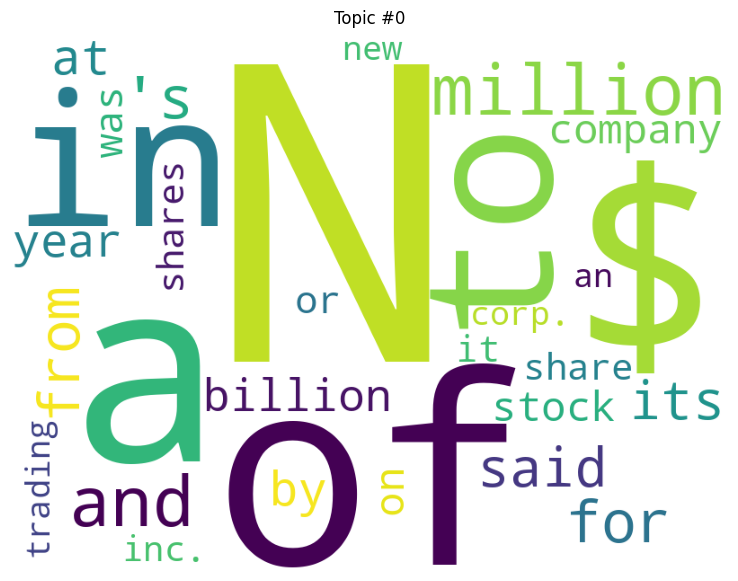

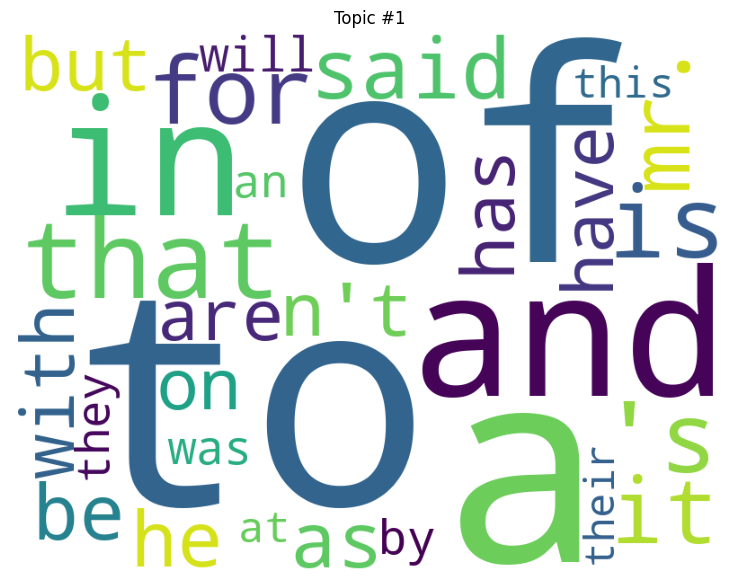

In [ ]:
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# PTBコーパスの読み込み（ここではgensimのLineSentenceを使用）
data = gensim.models.word2vec.LineSentence('lstm/data/ptb.train.txt')  # PTBコーパスのファイルパスを指定

# トークン化されたデータを辞書に変換し、特定の単語をフィルタリング
dictionary = corpora.Dictionary(data)

# '<unk>' トークンを除外
if '<unk>' in dictionary.token2id:
    unk_id = dictionary.token2id['<unk>']
    dictionary.filter_tokens(bad_ids=[unk_id])

# あまりにも頻繁/まれにしか出現しない単語を除外
dictionary.filter_extremes(no_below=5, no_above=0.5)

# フィルタリング後の辞書を使用してコーパスを作成
corpus = [dictionary.doc2bow(text) for text in data]

# LDAモデルの作成
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# 各トピックの単語とその重要度を取得し、WordCloudで可視化
for i in range(2):
    plt.figure(figsize=(10, 7))  # WordCloudのサイズを調整
    plt.imshow(WordCloud(background_color='white', width=800, height=600).fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis("off")
    plt.title(f"Topic #{i}")
    plt.show()


# ビートルズの歌詞をトピック分析する

In [ ]:
! rm -rf beatles-lyrics
! git clone https://github.com/tylerlewiscook/beatles-lyrics.git


Cloning into 'beatles-lyrics'...
remote: Enumerating objects: 421, done.
remote: Total 421 (delta 0), reused 0 (delta 0), pack-reused 421
Receiving objects: 100% (421/421), 111.51 KiB | 630.00 KiB/s, done.
Resolving deltas: 100% (54/54), done.


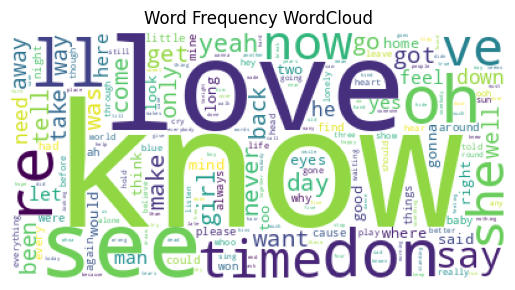

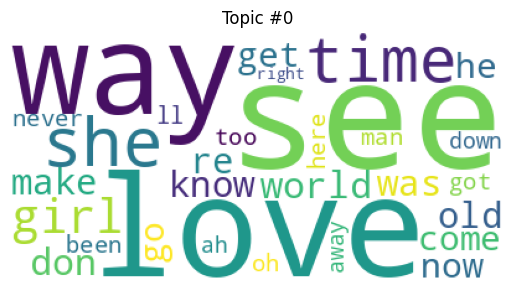

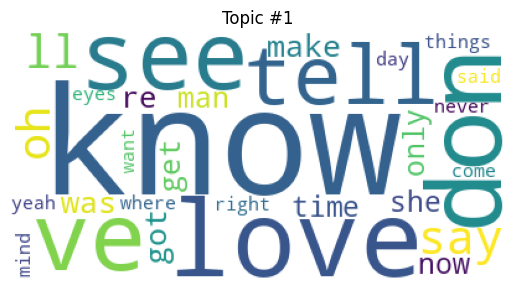

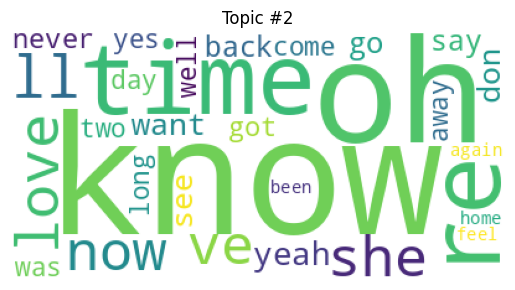

In [ ]:
import os
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from collections import defaultdict

# ストップワードのリスト
stopwords = set(["you", "me", "the", "to", "and", "in", "it", "is", "of", "for", "on", "with", "as", "this", "that", "are", "be", "at", "by", "an", "have", "from", "or", "not", "my", "your", "all", "can", "but", "has", "if", "will", "do", "we", "they", "so", "what", "about", "which", "their", "there", "when", "who", "them", "more", "how", "our", "other", "out", "up", "one", "also", "some", "no", "like", "his", "her", "just", "then"])

lyrics_dir = 'beatles-lyrics/lyrics'

# 歌詞データの読み込みと前処理（ストップワード除去と重複の排除を含む）
data = []
for album_dir in os.listdir(lyrics_dir):
    album_path = os.path.join(lyrics_dir, album_dir)
    if os.path.isdir(album_path):
        for song_file in os.listdir(album_path):
            if song_file.endswith('.txt'):
                song_path = os.path.join(album_path, song_file)
                try:
                    with open(song_path, 'r') as file:
                        # トークン化してからストップワードを除去し、重複を排除
                        tokens = gensim.utils.simple_preprocess(file.read())
                        filtered_tokens = [word for word in tokens if word not in stopwords]
                        unique_tokens = set(filtered_tokens)  # 重複を排除
                        data.append(list(unique_tokens))  # セットをリストに戻す
                except Exception as e:
                    print(f"Error reading file {song_path}: {e}")


# 単語の頻度を集計
word_freq = defaultdict(int)
for text in data:
    for word in text:
        word_freq[word] += 1

# WordCloudで語彙の頻度に基づいて出力
plt.figure()
plt.imshow(WordCloud(background_color='white').generate_from_frequencies(word_freq))
plt.axis("off")
plt.title("Word Frequency WordCloud")
plt.show()

# 辞書とコーパスの作成
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

# LDAモデルの作成
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# WordCloudでトピックの可視化
for i in range(3):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis("off")
    plt.title(f"Topic #{i}")
    plt.show()


# デビットボウイの歌詞をトピック分析する

In [ ]:
!pip install requests beautifulsoup4


In [ ]:
import os
import requests
from bs4 import BeautifulSoup

def create_directory(dir_name):
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

def get_song_data(url):
    response = requests.get(url)
    if response.status_code != 200:
        return None, None

    soup = BeautifulSoup(response.content, 'html.parser')
    title_element = soup.find('h1', class_='display-4')
    lyrics_elements = soup.find_all('p', class_='lead')

    title = title_element.get_text(strip=True) if title_element else "Unknown_Title"
    lyrics_lines = [elem.get_text(strip=True) for elem in lyrics_elements]
    if lyrics_lines:
        lyrics_lines = lyrics_lines[:-1]  # 最終行を除外
    lyrics = "\n".join(lyrics_lines)
    return title, lyrics

base_url = 'https://nickospi.github.io/bowie/songs/'
base_dir = 'd-bowie-lyrics'

create_directory(base_dir)

for i in range(270):
    song_url = f'{base_url}{i}/index.html'
    title, lyrics = get_song_data(song_url)
    if title and lyrics:
        song_dir = os.path.join(base_dir, title)
        create_directory(song_dir)
        with open(os.path.join(song_dir, 'lyrics.txt'), 'w', encoding='utf-8') as file:
            file.write(lyrics)


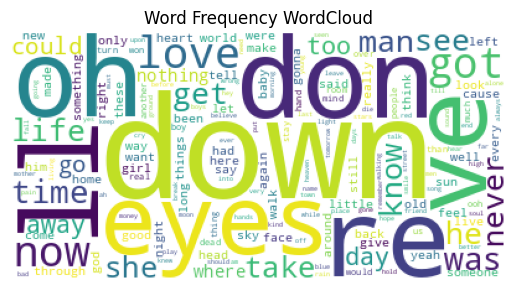

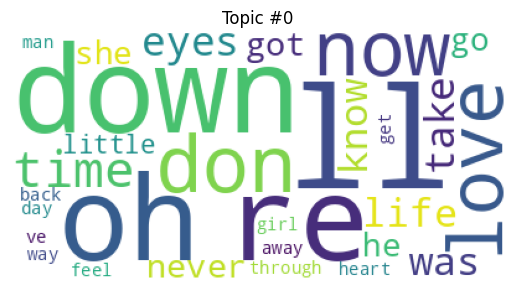

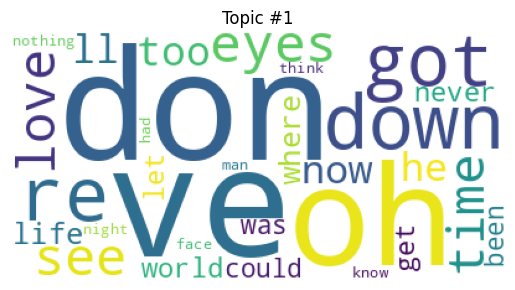

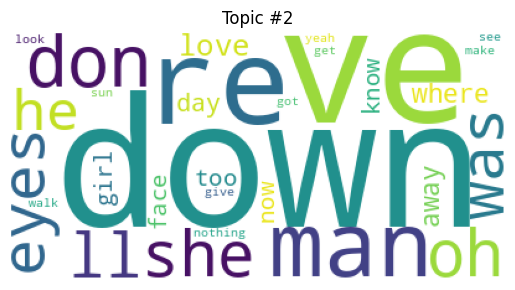

In [ ]:
import os
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from collections import defaultdict

# ストップワードのリスト
stopwords = set(["you", "me", "the", "to", "and", "in", "it", "is", "of", "for", "on", "with", "as", "this", "that", "are", "be", "at", "by", "an", "have", "from", "or", "not", "my", "your", "all", "can", "but", "has", "if", "will", "do", "we", "they", "so", "what", "about", "which", "their", "there", "when", "who", "them", "more", "how", "our", "other", "out", "up", "one", "also", "some", "no", "like", "his", "her", "just", "then"])

lyrics_dir = 'd-bowie-lyrics'

# 歌詞データの読み込みと前処理（ストップワード除去と重複の排除を含む）
data = []
for album_dir in os.listdir(lyrics_dir):
    album_path = os.path.join(lyrics_dir, album_dir)
    if os.path.isdir(album_path):
        for song_file in os.listdir(album_path):
            if song_file.endswith('.txt'):
                song_path = os.path.join(album_path, song_file)
                try:
                    with open(song_path, 'r') as file:
                        # トークン化してからストップワードを除去し、重複を排除
                        tokens = gensim.utils.simple_preprocess(file.read())
                        filtered_tokens = [word for word in tokens if word not in stopwords]
                        unique_tokens = set(filtered_tokens)  # 重複を排除
                        data.append(list(unique_tokens))  # セットをリストに戻す
                except Exception as e:
                    print(f"Error reading file {song_path}: {e}")


# 単語の頻度を集計
word_freq = defaultdict(int)
for text in data:
    for word in text:
        word_freq[word] += 1

# WordCloudで語彙の頻度に基づいて出力
plt.figure()
plt.imshow(WordCloud(background_color='white').generate_from_frequencies(word_freq))
plt.axis("off")
plt.title("Word Frequency WordCloud")
plt.show()

# 辞書とコーパスの作成
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

# LDAモデルの作成
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# WordCloudでトピックの可視化
for i in range(3):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis("off")
    plt.title(f"Topic #{i}")
    plt.show()


![11](https://drive.google.com/uc?export=view&id=1bID-8gzaCWu_oje-K012akMScHsC2HS6)
![12](https://drive.google.com/uc?export=view&id=1T7IWUfE36wycGAUZ8-tn9lLw7YZNTbs9)
![13](https://drive.google.com/uc?export=view&id=1Y0XjDglCu8UCfNYo1fqjLR0BGZAVJcQO)
![14](https://drive.google.com/uc?export=view&id=1PFqvHs00UJBu-FFPE8W25KLIMWFrIggI)
![15](https://drive.google.com/uc?export=view&id=12n7cakElsEvP6JdPW4TkKzxo4L9EZvxP)




このプログラムは、IMDB映画レビューデータセットを使用して感情分析を行うためのニューラルネットワークモデルを構築し、訓練するものです。具体的には、映画レビューがポジティブ（肯定的）かネガティブ（否定的）かを分類します。以下に、プログラムの主要な部分を説明します。

### データセットの読み込みと前処理
- **IMDBデータセットの読み込み**: `imdb.load_data` 関数を使用して、最も頻繁に出現する単語の上位10,000語を含むIMDB映画レビューデータセットを読み込みます。
- **パディング**: `pad_sequences` 関数を使用して、各レビューの長さを一定の最大長（`maxlen=100`）に揃えます。これにより、すべてのレビューが同じ長さの数値配列に変換されます。

### モデルの構築
- **埋め込み層（Embedding Layer）**: `Embedding` 層は、各単語IDを128次元の密なベクトルに変換します。これは、単語の意味的な表現を学習するために使用されます。
- **LSTM層**: `LSTM` 層は、32ユニットを持ち、テキストデータのシーケンシャルな特性を捉えるために使用されます。
- **出力層**: `Dense` 層は、シグモイド活性化関数を使用して、レビューがポジティブかネガティブかを表す確率を出力します。入力データとしてはLSTMを通過した隠れ層hの重みデータが文章の特徴として用いられます。

### モデルのコンパイルと訓練
- **コンパイル**: モデルは、`binary_crossentropy` 損失関数と `adam` オプティマイザを使用してコンパイルされます。
- **訓練**: `model.fit` 関数を使用して、訓練データでモデルを訓練します。

### 任意の文章の分類
- **`classify_review` 関数**: この関数は、任意のテキストを受け取り、トークン化し、単語IDに変換し、パディングを行い、モデルを使用してその感情を分類します。

### 入力データの形式
　このプログラムでは、入力データはOne-Hotエンコーディングではなく、埋め込み層（Embedding Layer）を使用しています。`Embedding` 層は、単語IDを密なベクトル表現に変換し、これにより単語の意味的な特徴を捉えることができます。これは、Word2Vecのような事前学習された単語埋め込みとは異なり、モデルの訓練プロセスの一部として学習されます。
　LSTMモデルにおいて `Embedding` 層を使用する場合、モデルはLSTM層の学習を行いながら同時に単語ベクトルも学習します。このプロセスについて、いくつかの重要な点を説明します。

### 単語ベクトルの学習
- **初期状態**: `Embedding` 層は、各単語に対してランダムに初期化されたベクトルを割り当てます。
- **学習プロセス**: モデルの訓練中、これらのベクトルはバックプロパゲーションによって徐々に調整されます。つまり、ネットワークが訓練データから学習するにつれて、単語ベクトルも最適化されていきます。

### 一貫性と学習の進行
- **学習の初期段階**: 学習の初期段階では、単語ベクトルは大きく変化する可能性があります。これは、モデルがまだデータから十分な情報を学習していないためです。
- **学習の進行**: 学習が進むにつれて、単語ベクトルは安定し、変化が少なくなります。モデルがデータからのパターンを学習し、単語の意味的特徴をより適切に捉えるようになるためです。

### 一貫性の問題
- **一貫性の確保**: 学習中に単語ベクトルが変化することは、一貫性の問題を引き起こす可能性がありますが、これは通常の学習プロセスの一部です。モデルが十分に訓練され、収束すると、単語ベクトルは安定し、一貫性が保たれます。
- **予測時の安定性**: モデルが訓練を終えて使用される段階では、単語ベクトルは固定され、予測時に変化することはありません。したがって、訓練後のモデルは一貫した予測を行います。

### 結論
`Embedding` 層を使用する場合、LSTMの学習と同時に単語ベクトルも学習されますが、これはモデルがデータから意味的な特徴を学習するための重要なプロセスです。訓練が完了すれば、単語ベクトルは安定し、モデルは一貫した予測を行うことができます。

---

## 入力データに用いる単語の表現形式
LSTMの入力データにEmbedding層を使用するかOne-Hotエンコーディングを使用するかによって、結果には確かに差が出る可能性があります。これらのアプローチの違いが結果にどのように影響するかを詳しく見ていきましょう。

### Embedding層の使用
- **密なベクトル表現**: Embedding層は、各単語を密なベクトル（低次元）にマッピングします。これにより、単語間の意味的な関係を捉えることができます。
- **パラメータの効率性**: Embedding層は、特に大きな語彙を持つ場合に、One-Hotエンコーディングに比べてはるかに少ないパラメータで済みます。
- **学習可能な表現**: Embedding層は学習可能であり、特定のタスクに対して単語の表現を最適化することができます。
- **結果**: Embedding層を使用することで、モデルは単語の意味的なニュアンスをよりよく捉え、結果として精度の高い予測が可能になることが多いです。

### One-Hotエンコーディングの使用
- **スパースなベクトル表現**: One-Hotエンコーディングは、各単語を大きなスパース（ほとんどがゼロの）ベクトルにマッピングします。
- **パラメータの非効率性**: One-Hotエンコーディングは、特に語彙が大きい場合に非常に多くのパラメータを必要とします。
- **単語間の関係の欠如**: One-Hotエンコーディングでは、単語間の意味的な関係を捉えることができません。
- **結果**: One-Hotエンコーディングを使用すると、モデルは単語の意味的な関係を学習できず、結果として精度が低下する可能性があります。

### 結論
- **タスクによる**: タスクの性質によって、Embedding層とOne-Hotエンコーディングのどちらが適しているかが異なります。一般的に、単語の意味的な関係が重要な場合（例えば、テキスト分類や感情分析）はEmbedding層が適しています。
- **リソースとパフォーマンス**: Embedding層は、計算リソースをより効率的に使用し、通常はより良いパフォーマンスを提供します。

最終的には、特定のアプリケーションや利用可能なデータ、計算リソースに基づいて、どちらのアプローチを使用するかを決定する必要があります。

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# IMDBデータセットの読み込み
# ここでは、データセットから最も頻繁に出現する単語の上位10000語を使用
max_features = 10000  # 使用する単語の数
maxlen = 100  # 各レビューの最大長さ

print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# データの前処理
# 各レビューの長さを揃えるためにパディングを行う
print("Pad sequences (samples x time)")
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# LSTMモデルの構築
model = Sequential()
model.add(Embedding(max_features, 128))  # 埋め込み層
model.add(LSTM(32))  # LSTM層（32ユニット）
model.add(Dense(1, activation='sigmoid'))  # 出力層（1ユニット、シグモイド活性化）

# モデルのコンパイル
# 二値分類問題なのでbinary_crossentropyを損失関数として使用
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# モデルの訓練
# 訓練データの20%を検証データとして使用
model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# 任意の文章の分類関数
def classify_review(model, text, word_index, maxlen):
    # テキストをトークン化
    tokens = tf.keras.preprocessing.text.text_to_word_sequence(text)
    # トークンを単語IDに変換（辞書にない単語はID 0を割り当て）
    tokens = [word_index[word] if word in word_index else 0 for word in tokens]
    # パディング
    padded = pad_sequences([tokens], maxlen=maxlen)
    # 予測
    pred = model.predict(padded)
    return pred[0][0]

# IMDBデータセットの単語インデックスを取得
word_index = imdb.get_word_index()

# 任意の文章の分類
# この例では「This movie is fantastic! I really like it.」という文章を分類
sample_text = "This movie is fantastic! I really like it."
prediction = classify_review(model, sample_text, word_index, maxlen)

print("Review:", sample_text)
print("Prediction (0 = negative, 1 = positive):", prediction)



Loading data...
17464789/17464789 [==============================] - 0s 0us/step
Pad sequences (samples x time)
Epoch 1/10
157/157 [==============================] - 42s 218ms/step - loss: 0.4725 - acc: 0.7695 - val_loss: 0.3556 - val_acc: 0.8464
Epoch 2/10
157/157 [==============================] - 27s 172ms/step - loss: 0.2645 - acc: 0.8968 - val_loss: 0.3541 - val_acc: 0.8430
Epoch 3/10
157/157 [==============================] - 27s 174ms/step - loss: 0.1950 - acc: 0.9268 - val_loss: 0.3926 - val_acc: 0.8402
Epoch 4/10
157/157 [==============================] - 28s 179ms/step - loss: 0.1431 - acc: 0.9498 - val_loss: 0.5131 - val_acc: 0.8302
Epoch 5/10
157/157 [==============================] - 29s 183ms/step - loss: 0.1117 - acc: 0.9631 - val_loss: 0.4736 - val_acc: 0.8336
Epoch 6/10
157/157 [==============================] - 27s 169ms/step - loss: 0.0929 - acc: 0.9680 - val_loss: 0.5262 - val_acc: 0.8206
Epoch 7/10
157/157 [==============================] - 27s 170ms/step - loss: 0

![16](https://drive.google.com/uc?export=view&id=1xytGigbkTZCB1r7HZvtmcc1pFAplHl-r)
![17](https://drive.google.com/uc?export=view&id=1ogrRqPtReYyvTmOnhi6gdEJ2d-KG3mBF)


# sequence to sequenceモデル＋アテンションによる翻訳モデル
[Google Colab](https://colab.research.google.com/github/YutaroOgawa/pytorch_tutorials_jp/blob/main/notebook/3_NLP/3_4_seq2seq_translation_tutorial_jp.ipynb)


# ビジュアルアテンションを用いた画像キャプショニング
[Google Colab](https://www.tensorflow.org/tutorials/text/image_captioning?hl=ja)


# 参考資料


![ゼロから作るディープラーニング２](https://www.oreilly.co.jp/books/images/picture_large978-4-87311-836-9.jpeg)

* [ゼロから作るディープラーニング２](https://www.oreilly.co.jp/books/9784873118369)



* [Keras datasets](https://zenn.dev/nekoallergy/articles/keras-datasets)
* [livedoor ニュースコーパス](https://www.rondhuit.com/download.html)
* [30分でわかる機械学習用語「次元削減](https://qiita.com/aya_taka/items/4d3996b3f15aa712a54f)
* [特異値分解と低ランク近似について](https://qiita.com/K_Noguchi/items/60ba6a08d1f913e74a83)
* [うさぎでもわかる線形代数　応用編第7羽　行列の特異値分解](https://www.momoyama-usagi.com/entry/math-linear-algebra-ap07)
* [わかるLSTM ～ 最近の動向と共に](https://qiita.com/t_Signull/items/21b82be280b46f467d1b)
* [難しいトピックモデルを簡単に！PythonライブラリGensimの使い方](https://www.sejuku.net/blog/67863#index_id5)
* [Word2vecモデル生成・超入門編](https://qiita.com/ka-son11/items/50c16568924575b4eb69)
* [gensimのpoincare embeddingを使って感情データをモデル化する](https://qiita.com/ayoyo/items/494ef9109f3a8f28bdde)
* [GoogleColabで【gensim/Python】を使ったトピックモデル【LDA】でレコメンドしてみた](https://qiita.com/KENTAROSZK/items/8acff45ddd93973aa027)
* [LDAによるトピック解析 with Gensim](https://qiita.com/Spooky_Maskman/items/0d03ea499b88abf56819)
* [Devid Bowie Lyrics](https://nickospi.github.io/bowie/songs/)
* [Kaggleデータ　AZLyrics - Recorded Songs with Lyrics](https://www.kaggle.com/datasets/marzenah/azlyrics-recorded-songs-with-lyrics?resource=download)
* [日本語によるキャプショニング](https://qiita.com/yutaoba/items/6eb0e12ba0d169a480df)
* [PyTorchチュートリアル（日本語翻訳版）](https://yutaroogawa.github.io/pytorch_tutorials_jp/)
* [TorchTextを使用したテキスト分類](https://colab.research.google.com/github/YutaroOgawa/pytorch_tutorials_jp/blob/main/notebook/3_NLP/3_5_text_sentiment_ngrams_tutorial_jp.ipynb)
* [画像キャプショニング](https://www.idnet.co.jp/column/page_253.html)

